Only select float64, int: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
The fifth column is what you are predicting.
Cannot clean columns yet
64.25
70.39
68.72
65.36
63.13
67.04
68.16
66.48
40.78
73.18


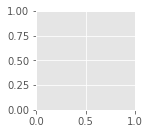

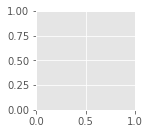

Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Survived      int64
dtype: object


TypeError: raw_input() takes from 1 to 2 positional arguments but 3 were given

In [7]:
#data analysis libraries 
import numpy as np
import pandas as pd
import sklearn

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Header
csv_file = str(input("What is the name of your csv file?"))
df = pd.read_csv(csv_file)
print('Only select float64, int: \n', df.dtypes)
print("The fifth column is what you are predicting.")
print('Cannot clean columns yet')
column1 = str(input("What is the first column?"))
column2 = str(input("What is the second column?"))
column3 = str(input("What is the third column?"))
column4 = str(input("What is the fourth column?"))
column5 = str(input("What is the fifth column?"))
df = df[[column1, column2, column3, column4, column5]]

# Clean any data with the average value
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean())

#Making Training and Testing Sets
predict = column5

X = np.array(df.drop([predict], 1))
y = np.array(df[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

#SVM
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

#Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

#Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

#Knn or K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

#Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

p = str(input("What would you like to be the IV of your graph?"))

#Scatter plot
style.use("ggplot")
plt.scatter(df[p],df[predict])
plt.xlabel(p)
plt.ylabel(predict)

plt.subplot(2, 3, 1)
plt.show()

'''
#Histogram
plt.hist(df[p],df[predict])
plt.xlabel(p)
plt.ylabel(predict)

plt.subplot(2, 3, 2)
plt.show()
'''

plt.pie(df[predict],
        labels=df[p])
plt.axis('equal')

plt.subplot(2, 3, 2)
plt.show()
# Printing the most accurate model
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

model = str(input("Which model would you like to use (gaussian, logreg, svc, linear_svc, perceptron, decisiontree, randomforest, knn, sgd, gbk)?"))
print(df.dtypes)
input1 = str(input("Input for ", column1))
input2 = str(input("Input for ", column2))
input3 = str(input("Input for ", column3))
input4 = str(input("Input for ", column4))

new_input = [[input1, input2, input3, input4]]
new_output = model.predict(new_input)
'''Design for using these models
1st Question "Which model do you want to use?
dfdtype and then ask for output data and use all the other inputs'''
